<a href="https://colab.research.google.com/github/SAKSHIGGG/Applied_Statistics/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Cost Analysis using some applied statistics

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### **Data Description:** 
Data at hand contains medical costs of people characterized by certain attributes.


### **Objective:**
Deep dive into the given data to find some valuable insights

## Steps and tasks:

1. Import necessary libraries
2. Read the data as a data frame
3. Perform basic EDA

### 1. Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read the data as a data frame

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/insurance (2).csv")

In [ ]:
# Get the first five rows of data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA

#### a. Shape of data

In [ ]:
print("Number of observations in given data: {}".format(data.shape[0]))
print("Number of attributes in given data: {}".format(data.shape[1]))

Number of observations in given data: 1338
Number of attributes in given data: 7


#### b. Data type of each attribute

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Since "children" attribute is a categorical attribute but it is given as numerical in the provided data. Hence, its data type must be changed from numerical to categorical.

In [ ]:
data['children'] = data['children'].astype("object")

#### c. Checking the presence of missing values

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### d. 5 point summary of numerical attributes (features)

5 point summary of any numerical feature includes the following:
* **min:** minimum value of the feature
* **max:** maximum value of the feature
* **25%:** 25th percentile or 1st quartile of the feature
* **50%:** 50th percentile or 2nd quartile or median of the feature
* **75%:** 75th percentile or 3rd quartile of the feature

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### e. Distribution of 'bmi', 'age' and 'charges' columns

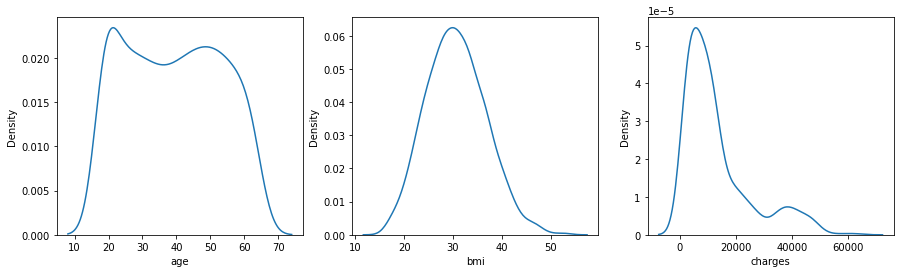

In [ ]:
# Make a list of 'age', 'bmi', 'charges'
a = ['age', 'bmi', 'charges']

plt.figure(figsize=(15, 4))
for i in range(len(a)):
  plt.subplot(1, 3, i+1)
  sns.kdeplot(data[a[i]])

#### f. Measure of skewness of 'bmi', 'age' and 'charges' columns

In [ ]:
print("bmi_skewness: {}\nage_skewness: {}\ncharges_skewness: {}".format(data['bmi'].skew(), data['age'].skew(), data['charges'].skew()))

bmi_skewness: 0.2840471105987448
age_skewness: 0.05567251565299186
charges_skewness: 1.5158796580240388


#### g. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

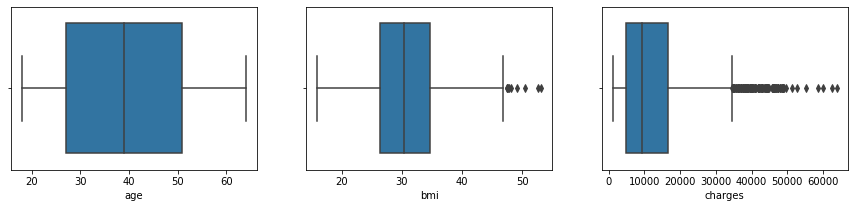

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(len(a)):
  plt.subplot(1, 3, i+1)
  sns.boxplot(data[a[i]])

'bmi' and 'charges' columns have outliers that can be seen from the above boxplot figures.

#### h. Distribution of categorical columns (include children)

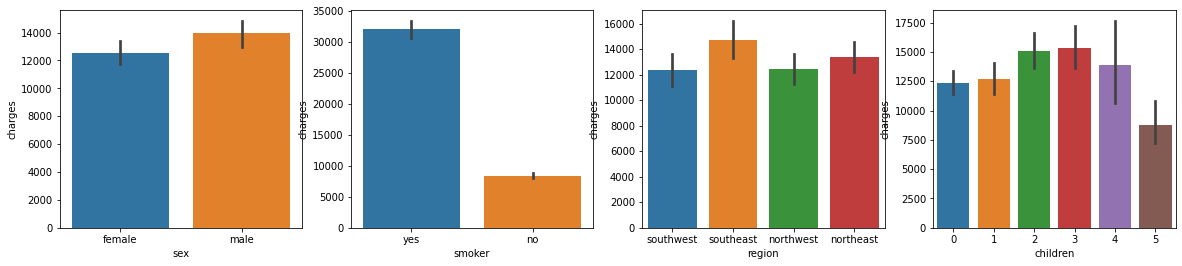

In [ ]:
# Make a list of categorical variables
b = ['sex', 'smoker', 'region', 'children']

plt.figure(figsize=(20, 4))
for i in range(len(b)):
  plt.subplot(1, 4, i+1)
  sns.barplot(data[b[i]], data['charges'])

#### i. Pair plot that includes all the columns of data frame

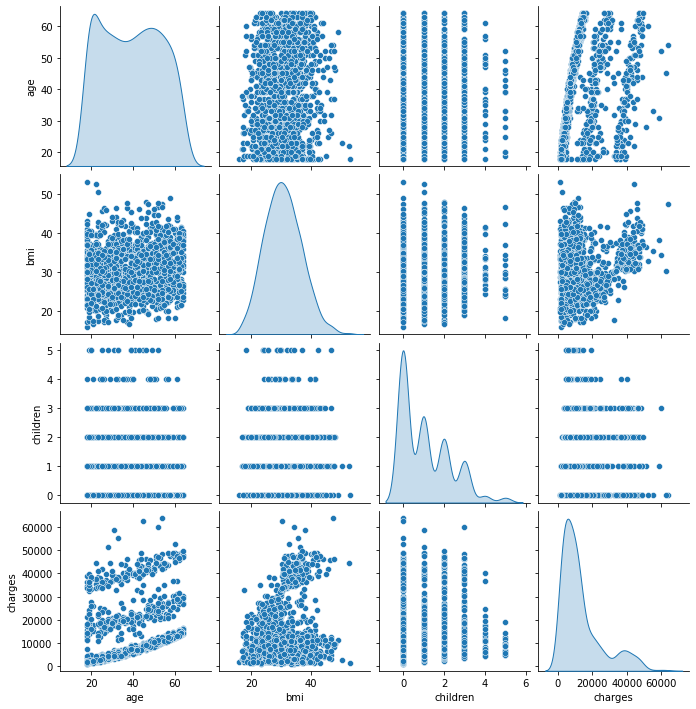

In [ ]:
sns.pairplot(data=data, diag_kind='kde');
#sns.pairplot(data=data);

### Answer the following questions with statistical evidence

#### a. Do charges of people who smoke differ significantly from the people who don't?

In [ ]:
pd.DataFrame(data.groupby(data['smoker']).charges.mean().round(3))

,charges
smoker,
no,8434.268
yes,32050.232


Yes, charges of people who smoke differ significantly from the people who don't smoke.

* Average charge of people who smoke: 32050.232
* Average charge of people who don't smoke: 8434.268

#### b. Does bmi of males differ significantly from that of females?

In [ ]:
pd.DataFrame(data.groupby(data['sex']).bmi.mean().round(3))

,bmi
sex,
female,30.378
male,30.943


No, bmi of males doesn't differ significantly from that of females.

* Average bmi of males: 30.378
* Average bmi of females: 30.943

#### c. Is the proportion of smokers significantly different in different genders?

In [ ]:
pd.crosstab(data['sex'], data['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


No, the proportions of female and male smokers aren't significantly different.

* Number of female smokers: 115
* Number of male smokers: 159

#### d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [ ]:
# Creating data in which women have no children
data_0 = data[(data['sex']=='female') & (data['children']==0)]

# Creating data in which women have one child
data_1 = data[(data['sex']=='female') & (data['children']==1)]

# Creating data in which women have two children
data_2 = data[(data['sex']=='female') & (data['children']==2)]

len(data_1.index), len(data_2.index), len(data_0.index)

(158, 119, 289)

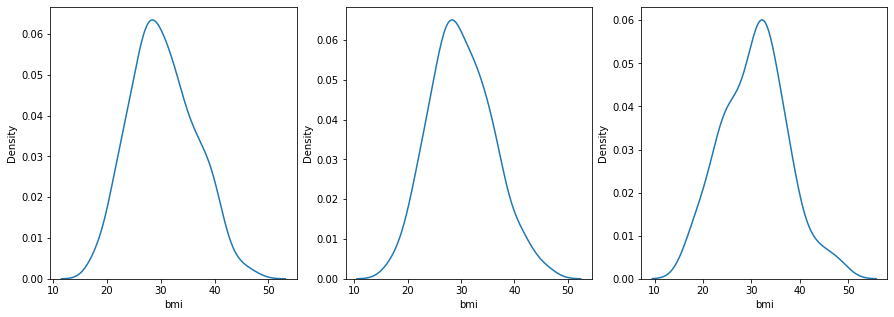

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(data_0['bmi'])
plt.subplot(1, 3, 2)
sns.kdeplot(data_1['bmi'])
plt.subplot(1, 3, 3)
sns.kdeplot(data_2['bmi']);

The distribution of bmi across women with no children, one child and two children is almost same as it can be seen from the above figure .